### Import main libraries


In [524]:
import numpy as np
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import scipy.stats as st

### Extract data 

In [525]:
data_array = []
csv_file_path='D:\\Artificial intelligence\\IA 2023 -\\Machine Learning\\Sklearn\\Regression\\BigMart Sales Prediction\\train.csv'
# Open the CSV file
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.reader(csv_file)
    
    # Iterate through each row in the CSV file
    for row in csv_reader:

        data_array.append(row)

data_array=np.array(data_array)
# data=data_array[1:,:].astype(float)

df= pd.DataFrame(data_array)

for i in range (len(df.columns)): # Renaming the columns 
    df.rename(columns={df.columns[i]: df.iloc[0,i]},inplace=True)
df.drop(0,inplace=True)




df.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
2,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
4,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38
5,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
7,FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
9,FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,,Tier 2,Supermarket Type1,1076.5986
10,FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,,Tier 2,Supermarket Type1,4710.535


### Data Cleaning 
#### Replacing missing values with searching same product

In [526]:
missing_weights=np.where((df['Item_Weight'] == ''))[0]
missing_id = df.iloc[missing_weights,:]['Item_Identifier'].values
for idx,value in enumerate(missing_id):
    filtered_indices = np.where((df['Item_Identifier'] == missing_id[idx]) & (df['Item_Weight'] != ''))[0]
    if len(filtered_indices) > 0:
        df.iloc[missing_weights[idx],1]=df.iloc[filtered_indices,:]['Item_Weight'].values[0]
    else:
        print(f'No similar product of {value}')

missing_weights=np.where((df['Outlet_Size'] == ''))[0]
print(f'missing Outlet size in indices : {(missing_weights)}')
missing_id = df.iloc[missing_weights,:]['Item_Identifier'].values
# print(f'id of missing weights : {missing_id[0]}')
for idx,value in enumerate(missing_id):
    filtered_indices = np.where((df['Item_Identifier'] == missing_id[idx]) & (df['Outlet_Size'] != ''))[0]
    if len(filtered_indices) > 0:
        df.iloc[missing_weights[idx],8]=df.iloc[filtered_indices,:]['Outlet_Size'].values[0]
    else:
        print(f'No similar product of {value}')

No similar product of FDN52
No similar product of FDK57
No similar product of FDE52
No similar product of FDQ60
missing Outlet size in indices : [   3    8    9 ... 8509 8514 8519]
No similar product of DRF48
No similar product of FDW10
No similar product of NCR42
No similar product of NCR42
No similar product of FDT35
No similar product of FDW10
No similar product of NCR42


#### Dropping unique products with missing values

In [527]:
df.replace('', np.nan, inplace=True)
df=df.dropna()

In [528]:

df['Item_Weight']=df['Item_Weight'].astype(float)
df['Item_Visibility']=df['Item_Visibility'].astype(float)
df['Item_MRP']=df['Item_MRP'].astype(float)
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype(float)


#### Data description :

In [529]:


# Categorical variables description
numeric_stats = df.describe()

numeric_stats

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8512.000000,8512.000000,8512.000000,8512.000000
mean,12.874813,0.066112,141.031196,2181.845998
std,4.644456,0.051601,62.271669,1706.283421
min,4.555000,0.000000,31.290000,33.290000
25%,8.785000,0.026962,93.846200,834.913200
50%,12.650000,0.053923,143.031200,1794.331000
75%,16.850000,0.094576,185.708200,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [530]:
# Categorical variables description
categorical_stats = df.describe(include=['object'])

categorical_stats

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8512,8512,8512,8512,8512,8512,8512,8512
unique,1551,5,16,10,9,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT013,1985,Medium,Tier 3,Supermarket Type1
freq,10,5082,1232,932,1459,3866,3345,5572


In [531]:
print(df['Item_Fat_Content'].unique())
# This columns have different syntaxes for the same variables
df.replace({'Item_Fat_Content': {'LF': 'Low Fat'}}, inplace=True)
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat'}}, inplace=True)
df.replace({'Item_Fat_Content': {'reg': 'Regular'}}, inplace=True)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [532]:
# Missing values 
df.isna().sum().sort_values(ascending=False)


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

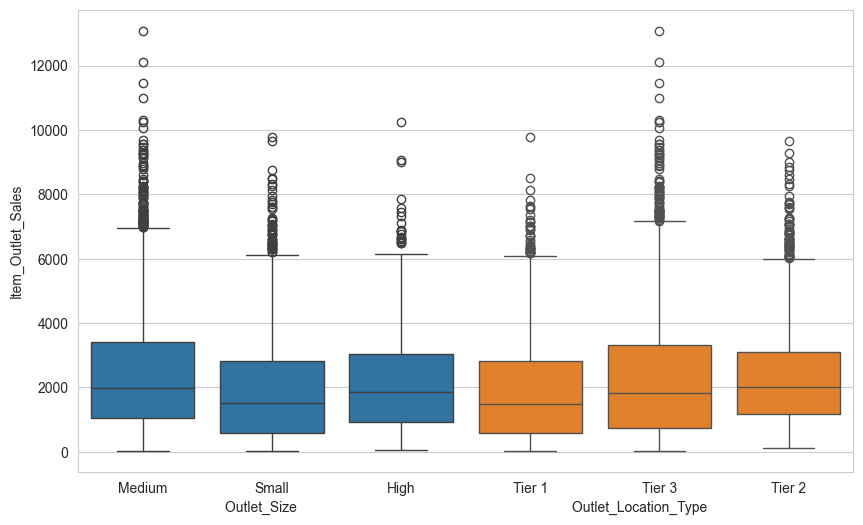

In [533]:
# Lets look at the columns Item_Visibility and Item_Fat_Content
plt.figure(figsize=(10, 6))

sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Outlet_Size'])
sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Outlet_Location_Type'])
plt.xlabel('Outlet_Size                                                                       Outlet_Location_Type')

plt.show()

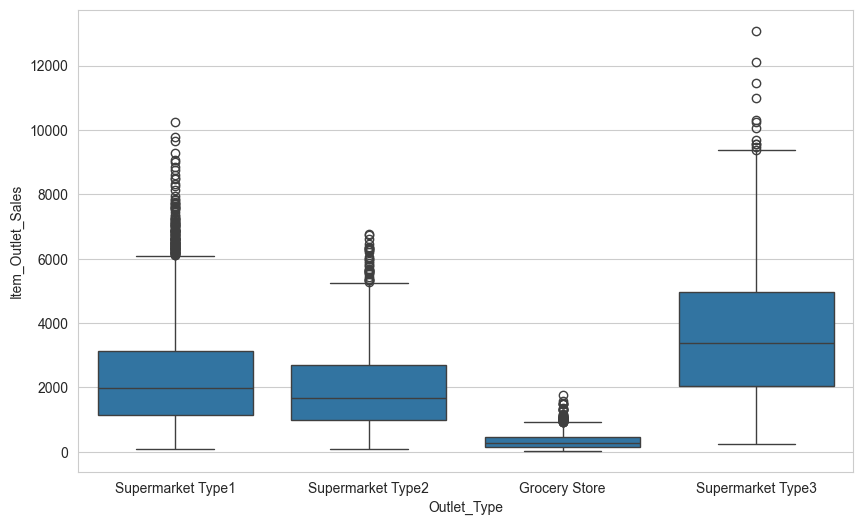

In [534]:
plt.figure(figsize=(10, 6))

sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Outlet_Type'])
plt.show()

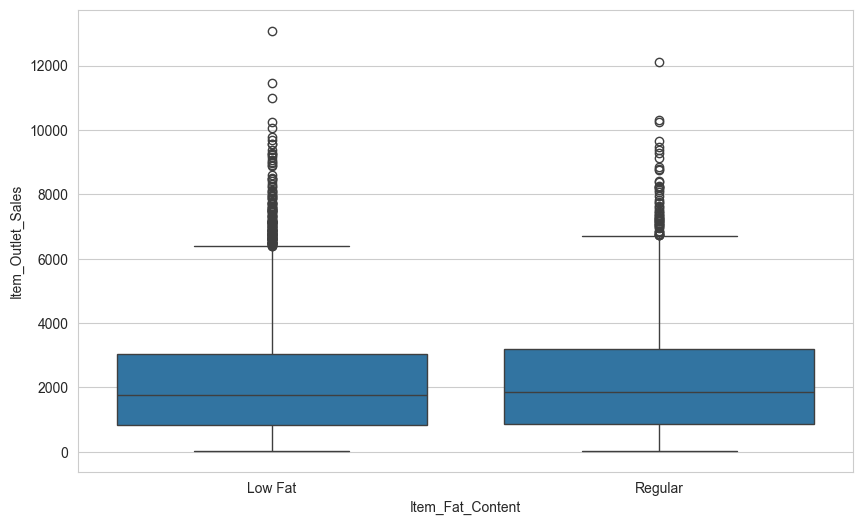

In [535]:
plt.figure(figsize=(10, 6))

sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Item_Fat_Content'])

plt.show()

### Outliers visualization

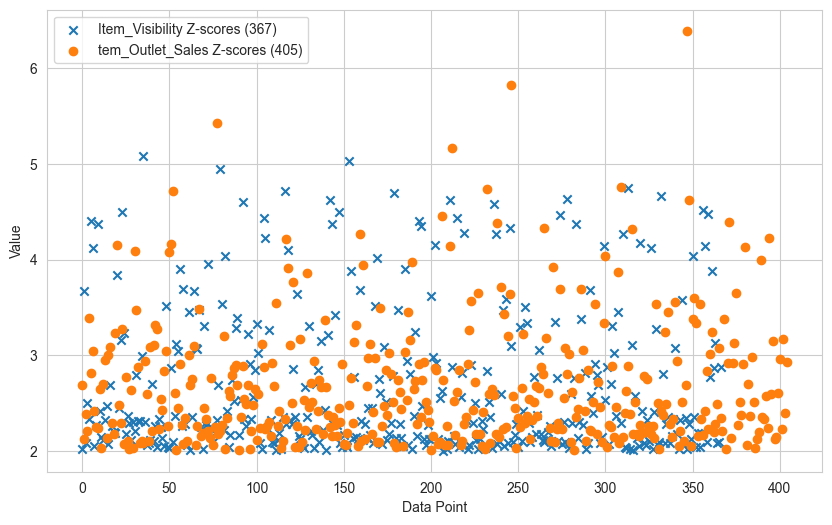

In [536]:
IV_zscore=st.zscore(df['Item_Visibility'])
IOS_zscore2=st.zscore(df['Item_Outlet_Sales'])
# Plot the original data
plt.figure(figsize=(10, 6))
IV_result = IV_zscore[(IV_zscore > 2) | (IV_zscore < -2)]
IOS_result2 = IOS_zscore2[(IOS_zscore2 > 2) | (IOS_zscore2 < -2)]
# Plot the Z-scores
plt.scatter(range(len(IV_result)), IV_result, label=f'Item_Visibility Z-scores ({len(IV_result)})', marker='x')
plt.scatter(range(len(IOS_result2)), IOS_result2, label=f'tem_Outlet_Sales Z-scores ({len(IOS_result2)})', marker='o')

# Add labels and a legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


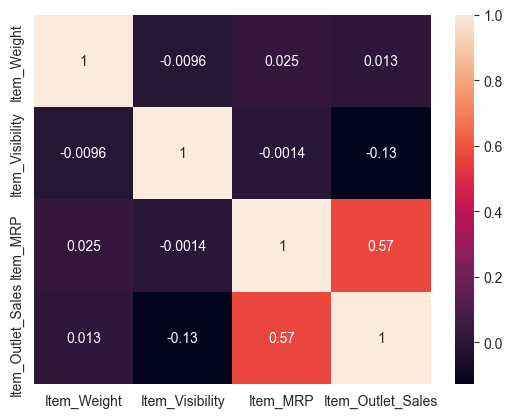

In [537]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

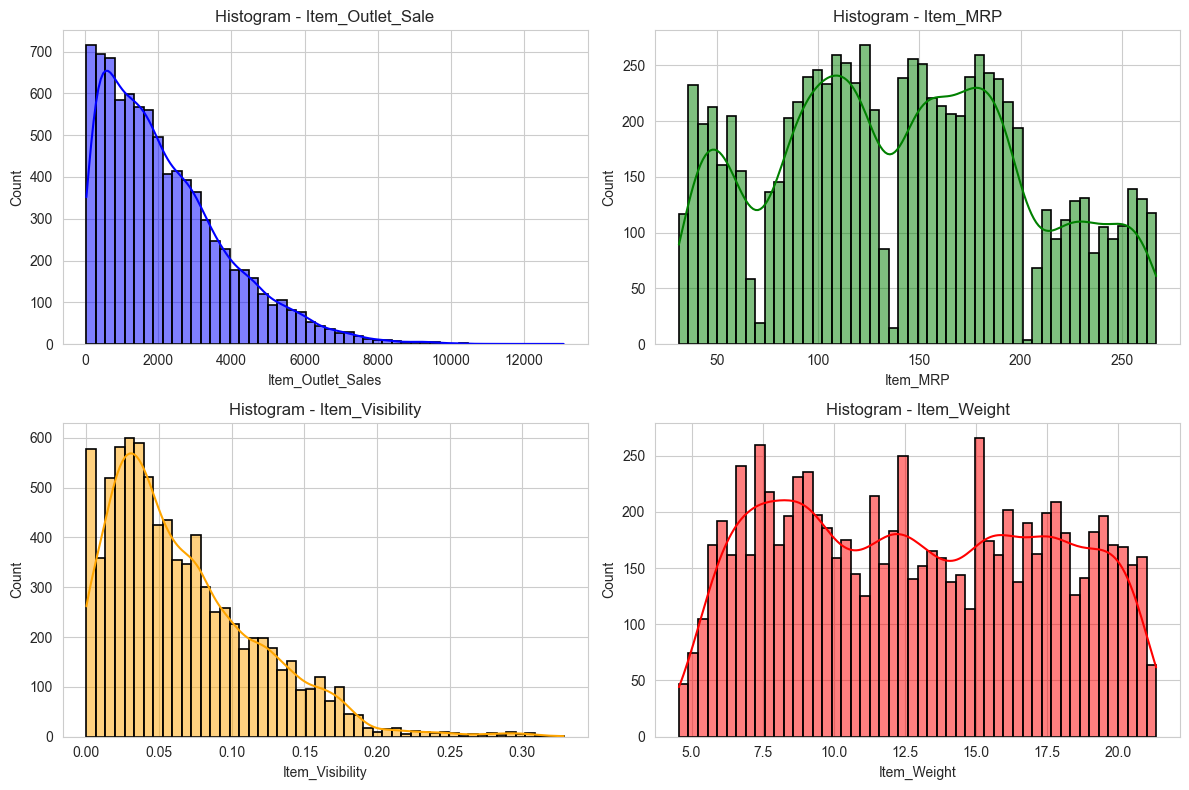

In [538]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


# Plot histograms with distribution lines for each column
sns.histplot(df['Item_Outlet_Sales'], bins=50, kde=True, ax=axes[0, 0], color='blue', edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('Histogram - Item_Outlet_Sale')

sns.histplot(df['Item_MRP'], bins=50, kde=True, ax=axes[0, 1], color='green', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('Histogram - Item_MRP')

sns.histplot(df['Item_Visibility'], bins=50, kde=True, ax=axes[1, 0], color='orange', edgecolor='black', linewidth=1.2)
axes[1, 0].set_title('Histogram - Item_Visibility')

sns.histplot(df['Item_Weight'], bins=50, kde=True, ax=axes[1, 1], color='red', edgecolor='black', linewidth=1.2)
axes[1, 1].set_title('Histogram - Item_Weight')

plt.tight_layout()
plt.show()

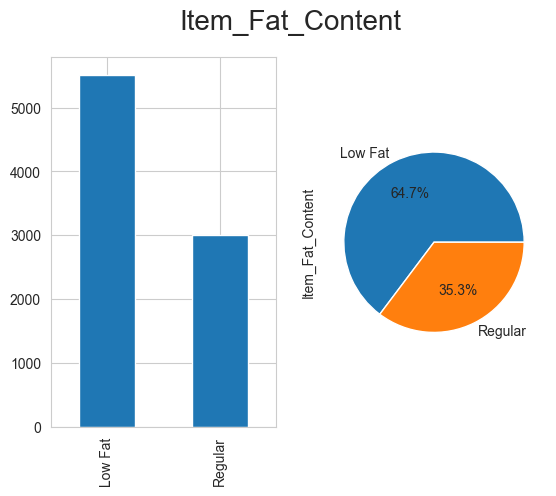

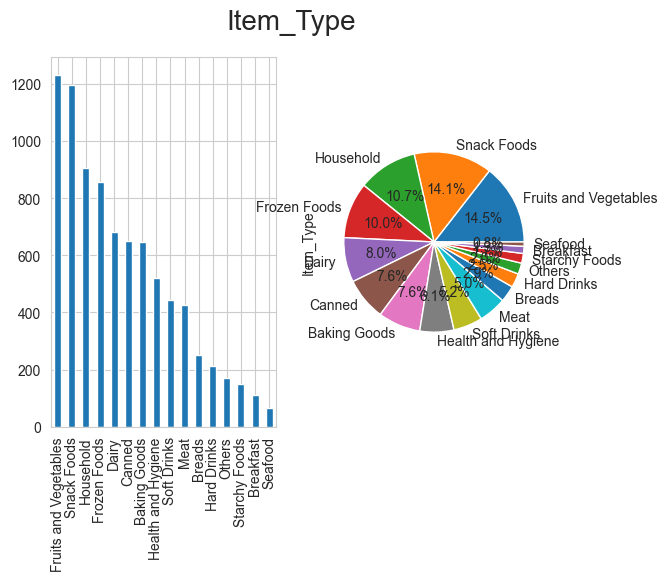

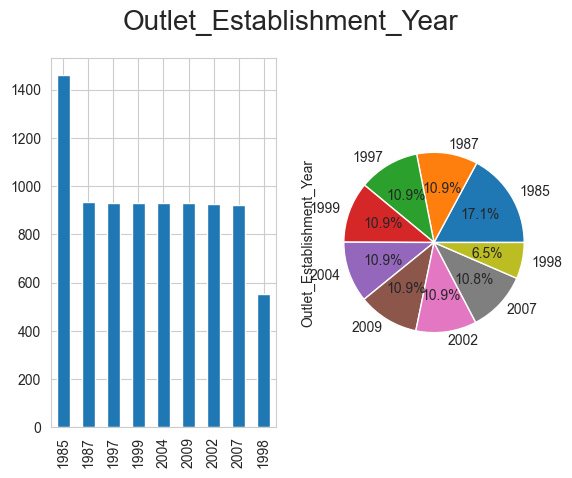

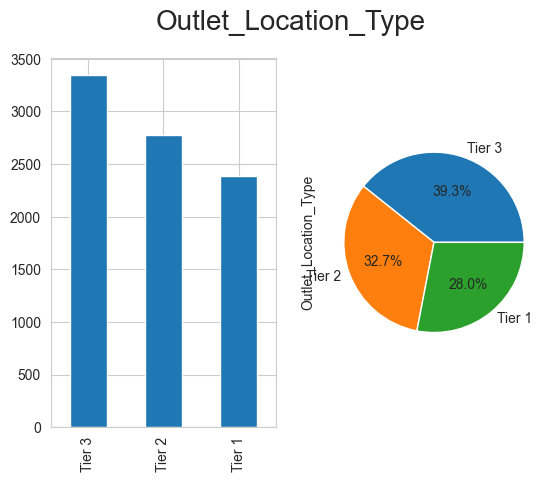

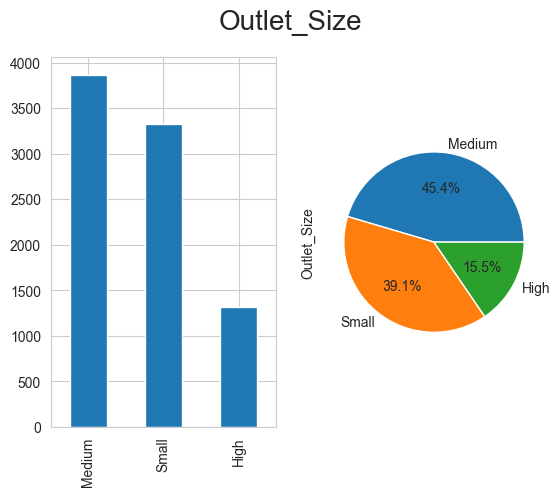

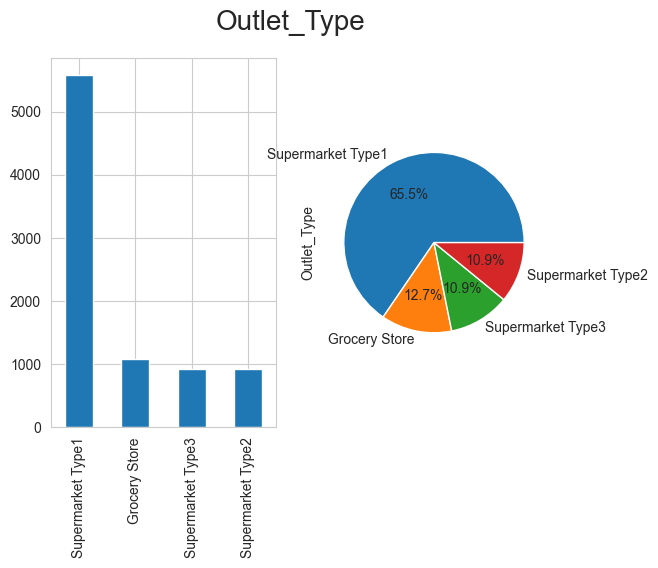

In [539]:
object_columns = df.select_dtypes(include=['object']).columns

# Convert selected columns to categorical type
df[object_columns] = df[object_columns].astype('category')

exclude_columns =['Item_Identifier','Outlet_Identifier']
categorical_columns = df.select_dtypes(include=['category']).columns.difference(exclude_columns)



# Categorical Features
for i in categorical_columns:

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle( i , fontsize=20) 

        sns.set_style('whitegrid')  # or any other Seaborn style you prefer
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar')
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.1f%%")
        plt.show()

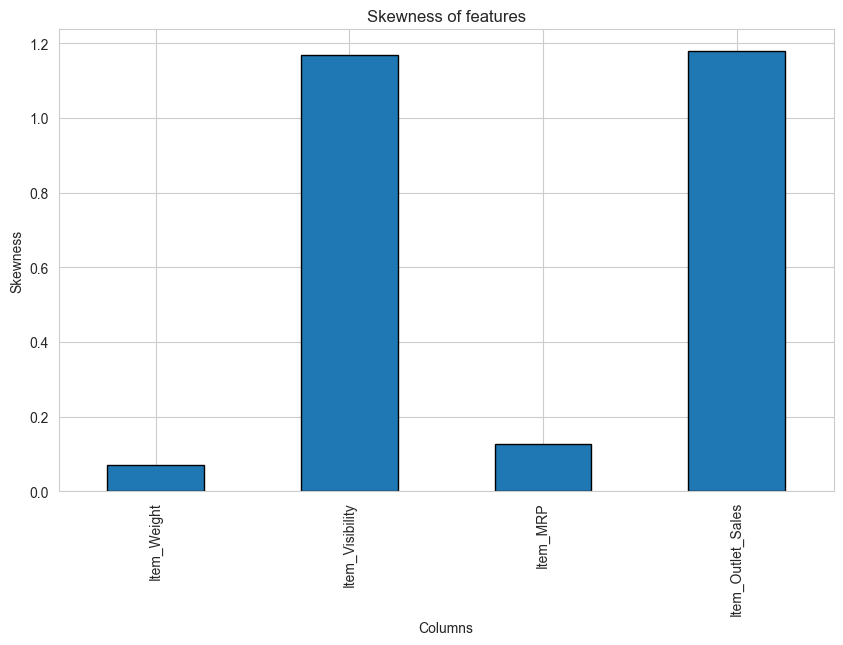

In [540]:
#get numerical features
numeric_df=df.select_dtypes(include=np.number)
skewness = numeric_df.apply(lambda x: st.skew(x))

#Plot
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', edgecolor='black')
plt.title('Skewness of features')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

In [541]:
Null_visibility=len(np.where(df['Item_Visibility']==0)[0])
print(Null_visibility)

526


<div style="background-color: rgb(28, 44, 42); ">
<h1 style="margin:0 30%;">Summary</h1>
<h4>1. Supermarkets have more sales than grocery stores but there is not a direct correlation between the size of the outlet and sales</h4>
<h4>2.1 low correlation between visibility and sales</h4>
<h4>2.2 high correlation between Item_MRP and sales</h4>
<h4>2.3 No correlation between sales and other numerical variables</h4>
<h4>3. There are some outliers according to the boxplot visualization and Z_scors of certain features</h4>
<h4>4. Item_Visibility and Item_Outlet_sales distributions are highly skewed as noticed in histplots </h4>
<h4>5. 526 Items with null visibility (6.2%)</h4>

</div>

In [542]:
##For more data visualizations

# from dataprep.eda import create_report
# create_report(df)

### Coding categorical features

In [543]:
# the indice of columns to encode
columns_to_encode = df.select_dtypes(include=['category']).columns #these columns unique values are <16

ordinal_encoder = pp.OrdinalEncoder(categories='auto')


df[columns_to_encode] = ordinal_encoder.fit_transform(df[columns_to_encode])+1 # To start encodign from 1

df.head(12)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,156.0,9.300,1.0,0.016047,5.0,249.8092,10.0,5.0,2.0,1.0,2.0,3735.1380
2,9.0,5.920,2.0,0.019278,15.0,48.2692,4.0,9.0,2.0,3.0,3.0,443.4228
3,660.0,17.500,1.0,0.016760,11.0,141.6180,10.0,5.0,2.0,1.0,2.0,2097.2700
4,1115.0,19.200,2.0,0.000000,7.0,182.0950,1.0,4.0,3.0,3.0,1.0,732.3800
5,1291.0,8.930,1.0,0.000000,10.0,53.8614,2.0,2.0,1.0,3.0,2.0,994.7052
6,755.0,10.395,2.0,0.000000,1.0,51.4008,4.0,9.0,2.0,3.0,3.0,556.6088
7,693.0,13.650,2.0,0.012741,14.0,57.6588,2.0,2.0,1.0,3.0,2.0,343.5528
8,735.0,19.000,1.0,0.127470,14.0,107.7622,6.0,1.0,2.0,3.0,4.0,4022.7636
9,439.0,16.200,2.0,0.016687,6.0,96.9726,8.0,6.0,3.0,2.0,2.0,1076.5986
10,985.0,19.200,2.0,0.094450,6.0,187.8214,3.0,8.0,3.0,2.0,2.0,4710.5350


### Data cleaning 

In [544]:
df_cleaned =df
df_cleaned.drop('Item_Identifier',axis=1,inplace=True)
df_cleaned.head(12)




,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,9.300,1.0,0.016047,5.0,249.8092,10.0,5.0,2.0,1.0,2.0,3735.1380
2,5.920,2.0,0.019278,15.0,48.2692,4.0,9.0,2.0,3.0,3.0,443.4228
3,17.500,1.0,0.016760,11.0,141.6180,10.0,5.0,2.0,1.0,2.0,2097.2700
4,19.200,2.0,0.000000,7.0,182.0950,1.0,4.0,3.0,3.0,1.0,732.3800
5,8.930,1.0,0.000000,10.0,53.8614,2.0,2.0,1.0,3.0,2.0,994.7052
6,10.395,2.0,0.000000,1.0,51.4008,4.0,9.0,2.0,3.0,3.0,556.6088
7,13.650,2.0,0.012741,14.0,57.6588,2.0,2.0,1.0,3.0,2.0,343.5528
8,19.000,1.0,0.127470,14.0,107.7622,6.0,1.0,2.0,3.0,4.0,4022.7636
9,16.200,2.0,0.016687,6.0,96.9726,8.0,6.0,3.0,2.0,2.0,1076.5986
10,19.200,2.0,0.094450,6.0,187.8214,3.0,8.0,3.0,2.0,2.0,4710.5350


In [545]:
scaler  = pp.StandardScaler()

df_cleaned['Item_MRP'] = scaler.fit_transform(df_cleaned[['Item_MRP']])
df_cleaned['Item_Weight'] = scaler.fit_transform(df_cleaned[['Item_Weight']])
df_cleaned.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,-0.769740,1.0,0.016047,5.0,1.746932,10.0,5.0,2.0,1.0,2.0,3735.1380
2,-1.497532,2.0,0.019278,15.0,-1.489722,4.0,9.0,2.0,3.0,3.0,443.4228
3,0.995910,1.0,0.016760,11.0,0.009424,10.0,5.0,2.0,1.0,2.0,2097.2700
4,1.361959,2.0,0.000000,7.0,0.659469,1.0,4.0,3.0,3.0,1.0,732.3800
5,-0.849409,1.0,0.000000,10.0,-1.399913,2.0,2.0,1.0,3.0,2.0,994.7052


### Data splitting 

In [546]:
from sklearn.model_selection import train_test_split

data=df_cleaned.iloc[:,:-1].values
target=df_cleaned.iloc[:,-1].values



poly = pp.PolynomialFeatures(degree=2)#Try degree=3 , you'll encounter overfitting (high trainScore , low TestScore)
data = poly.fit_transform(data)
X_train,X_test,y_train,y_test= train_test_split(data,target,test_size=0.2,shuffle=True)



### Training 

In [547]:
from sklearn.linear_model import RidgeCV,LassoCV,LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
import numpy as np

nn = 10  # Number of folds
n_repeats = 10# Number of repeats for repeated k-fold

rkf = RepeatedKFold(n_splits=nn, n_repeats=n_repeats, random_state=np.random.randint(0,10000))

coefficients = np.zeros((nn * n_repeats, len(data[1])))
intercepts = np.zeros(nn * n_repeats)
best_mae = float('inf')

for i, (train_index, test_index) in enumerate(rkf.split(data)):

    X_train = data[train_index]
    y_train = target[train_index]
    X_test = data[test_index]
    y_test = target[test_index]

    alphas = np.logspace(-6, 6, 13)

    ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)

    ridge_cv_model.fit(X_train, y_train)

    selected_alpha = ridge_cv_model.alpha_
    
    train_score =ridge_cv_model.score(X_train, y_train)
    test_score =ridge_cv_model.score(X_test, y_test)
    

    coefficients[i] = ridge_cv_model.coef_
    intercepts[i] = ridge_cv_model.intercept_

    y_pred = ridge_cv_model.predict(X_test)

    mae_value = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
    best_mae = min(best_mae, mae_value)

    if best_mae == mae_value:
        index_best_mae = i
        best_alpha = ridge_cv_model.alpha_
        best_train_score= train_score
        best_test_score= test_score
        print(f'NEW BEST MODEL Repeat {i // nn + 1}, Fold {i % nn + 1}')

    

print('----------------')
print(f'Best MAE is : {best_mae} of the fold nb :{index_best_mae} alpha : {best_alpha} \nTraining score {best_train_score}\nTest score {best_test_score}')



NEW BEST MODEL Repeat 1, Fold 1
NEW BEST MODEL Repeat 1, Fold 2
NEW BEST MODEL Repeat 1, Fold 3
NEW BEST MODEL Repeat 1, Fold 6
NEW BEST MODEL Repeat 1, Fold 7
NEW BEST MODEL Repeat 2, Fold 8
NEW BEST MODEL Repeat 2, Fold 10
NEW BEST MODEL Repeat 3, Fold 7
NEW BEST MODEL Repeat 8, Fold 5
----------------
Best MAE is : 717.333966421952 of the fold nb :74 alpha : 10.0 
Training score 0.5920550359186088
Test score 0.6380672877740897


In [548]:
import pickle
model={
    'alpha':best_alpha,
    'weights':coefficients[index_best_mae],
    'bias':intercepts[index_best_mae],
    'MAE':best_mae,
    'train_score':best_train_score,
    'test_score':best_test_score
}
with open('model.pkl','wb') as f:
    pickle.dump(model, f) # save the model into .pkl file (encoded)
    
with open('model.pkl','rb') as f:
   x = pickle.load(f)
   print(x)

{'alpha': 10.0, 'weights': array([ 0.00000000e+00,  3.99901065e+01, -3.85421211e+00, -3.00252332e+01,
       -1.82022317e+01,  3.61879699e+02,  1.89798344e+01,  6.40145502e+02,
       -2.54180539e+02,  2.37927713e+02,  4.49631856e+02, -2.97008195e+01,
       -1.87943948e+01, -1.84329475e+02,  2.39209715e+00,  9.43012742e+00,
       -4.84569468e+00,  3.79513207e+00, -7.96756611e+00, -9.86794426e-02,
        3.47877913e+00, -1.15626363e+01, -1.64106699e+02,  1.79391387e+00,
        3.10635968e+01, -5.49268923e+00,  3.91828734e+00,  3.12549391e+01,
       -2.57723938e+01,  3.54449988e+01,  2.74110895e+01,  3.03230903e+01,
       -5.68210368e+02,  3.42592325e+00, -1.72424861e+01, -2.01318791e+02,
        1.44122049e+02,  6.54553225e+01,  1.32471953e-01, -2.94632138e+00,
        2.61838642e+00,  6.89074581e-01, -5.50773498e+00,  1.18332985e+01,
       -9.16650001e+00, -1.44548078e+01,  2.81567121e+01,  6.15585306e+00,
       -1.04640962e+02, -4.16155488e+01,  3.44905528e+02, -7.96068194e+01